In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = [
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2,
    2.1,
    2.2,
    2.3,
    2.4,
    2.5,
    2.6,
    2.7,
    2.8,
    2.9,
    3,
]
df = []
masses = []

for label in labels:
    masses += [label]
    df += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

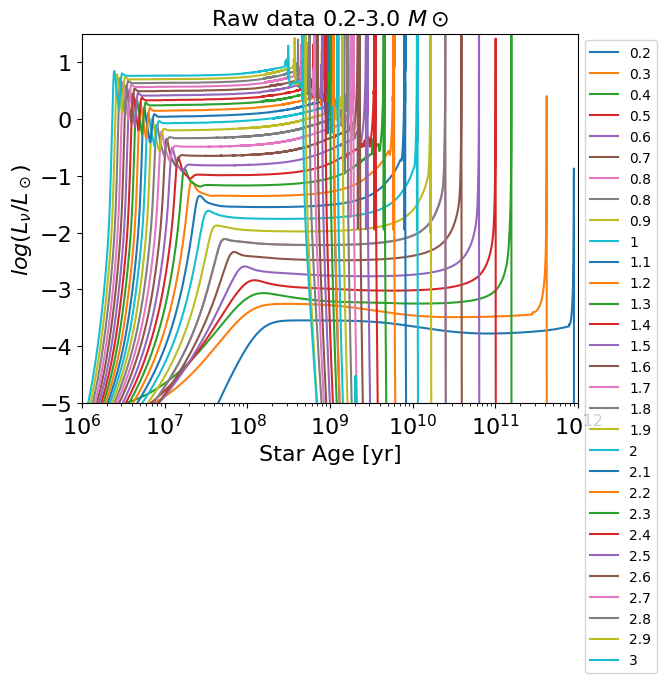

In [ ]:
ages=[]
lums=[]
for d in df:
    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]
    


In [ ]:
for a, l, label in zip(ages, lums, labels):
    plt.plot(a,l,label=label)
plt.ylim(-5,1.5)
plt.xlim(1e6,1e12)
plt.xscale('log')
plt.ylabel(r'$log(L_\nu/L_\odot)$', fontsize=16)
plt.xlabel('Star Age [yr]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(r'Raw data 0.2-3.0 $M\odot$', fontsize=16)
plt.legend(bbox_to_anchor=(2,1))

In [4]:
ages = []
lums = []
Temps = []
Rhos = []
ages1 = []
lums1 = []
Temps1 = []
Rhos1 = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d1 = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]
    d2 = d[(d["star_age"] > end_h_burning)]
    
    ages += [d1["star_age"]]
    lums += [d1["log_Lneu"]]
    Temps += [d1['log_center_T']]
    Rhos += [d1['log_center_Rho']]
    ages1 += [d2["star_age"]]
    lums1 += [d2["log_Lneu"]]
    Temps1 += [d2['log_center_T']]
    Rhos1 += [d2['log_center_Rho']]



(-4.0, 2.0)

C:\Users\LEGION\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\LEGION\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


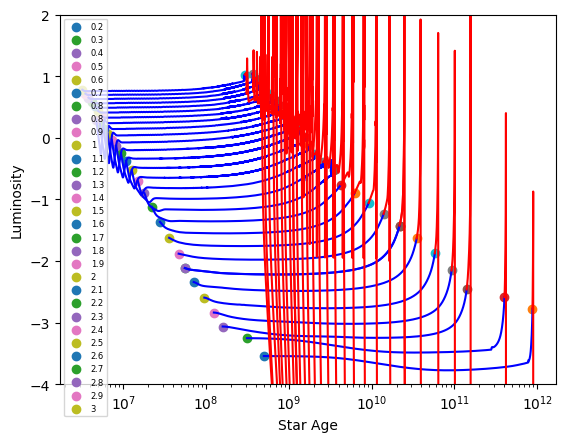

In [5]:

for a, l,a1,l1, label in zip(ages, lums,ages1,lums1, labels):
    plt.scatter(a.iloc[0],l.iloc[0],label=label)
    plt.scatter(a.iloc[-1],l.iloc[-1])
    plt.plot(a, l,color='blue')
    plt.plot(a1, l1,color='red')
plt.xlabel('Star Age')
plt.ylabel('Luminosity')
plt.legend(fontsize=6)
plt.xscale('log')
plt.ylim(-4,2)

Text(0, 0.5, 'Log Central Tc')

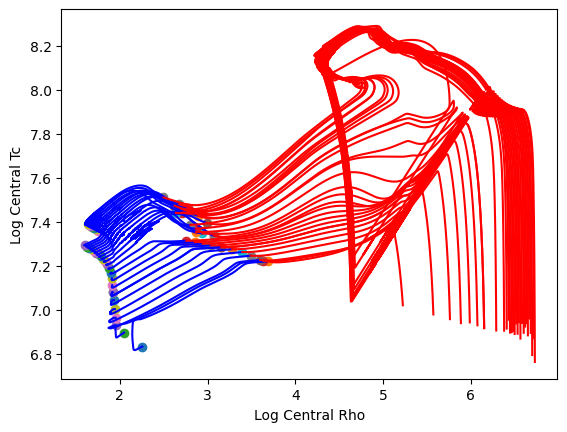

In [6]:
for a, l,T1,R1, label in zip(Rhos, Temps,Temps1,Rhos1, labels):
    plt.scatter(a.iloc[0],l.iloc[0],label=label)
    plt.scatter(a.iloc[-1],l.iloc[-1])
    plt.plot(a, l,color='blue')
    plt.plot(R1, T1 ,color='red')
plt.xlabel('Log Central Rho')
plt.ylabel('Log Central Tc')

In [7]:
from mpl_toolkits import mplot3d



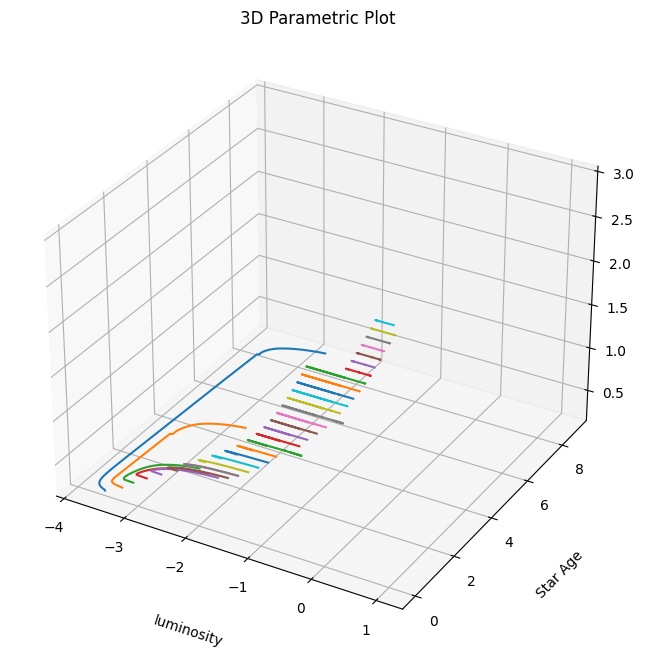

In [8]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()


for i,label in  enumerate(labels):
    t = label
    x = lums[i]
    y = ages[i]

    ax.plot3D(x, y, t)
    ax.set_title('3D Parametric Plot')

    # Set axes label
    ax.set_xlabel('luminosity', labelpad=20)
    ax.set_ylabel('Star Age', labelpad=20)
    ax.set_zlabel('Mass', labelpad=20)

plt.show()